In [61]:
import h5py as h5
import arepo
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.interpolate import interp1d

In [2]:
# idxs = np.arange(0, 2000+1, 10)
idxs = np.array([0, 10, 20, 30])
sn = {}
for idx in idxs:
    try:
        sn[idx] = arepo.Snapshot('lvl5-beta08-adi-dens/output', idx, combineFiles=True)
    except Exception:
        print('up to idx=', idx-1)
        break

In [3]:
def gas_profile(sn, rmax=300, Nbin=1024, dN=1024, center=None):
    if center is None:
        center = np.array([sn.BoxSize] * 3)/2.

    pos = sn.part0.CenterOfMass - center
    r = np.linalg.norm(pos, axis=1)
    N = len(r)
    
    out = {}
    out['rlist'] = []
    out['rholist'] = []
    out['err_rholist'] = []
    
    imin = 0
    
    keysort = np.argsort(r)
    r = r[keysort]
    rho = sn.part0.rho.value[keysort]
    
    while imin < N:
        averho = np.mean(rho[imin:imin+Nbin])
        aver = np.mean(r[imin:imin+Nbin])

        # rho_err = np.std(rho[imin:imin+Nbin])
        
        out['rlist'].append(aver)
        out['rholist'].append(averho)
        # out['err_rholist'].append(rho_err)
        
        imin += dN
    
    for k in out.keys():
        out[k] = np.array(out[k])
    
    # now make plotting rlist
    out['rlist_plot'] = np.logspace(-1, 3, 10000)
    out['rho_interp'] = interp1d(out['rlist'], out['rholist'], bounds_error=False, fill_value='extrapolate')
    out['rholist_plot'] = out['rho_interp'](out['rlist_plot'])
    
    return out

In [4]:
prof = {}
for idx in sn.keys():
    prof[idx] = gas_profile(sn[idx])

In [5]:
prof.keys()

dict_keys([0, 10, 20, 30])

In [6]:
prof[0]['rholist'].shape

(335,)

(1, 200)

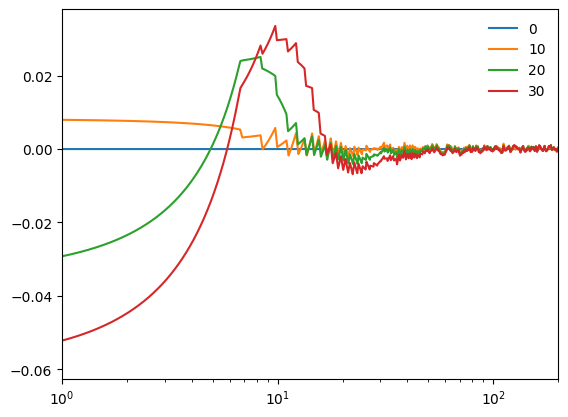

In [7]:
idx_list = np.array([0, 10, 20, 30])#0, 200, 400, 1000, 1600, 2000])

idx_first = idx_list[0]
idx_last = idx_list[-1]

# idx_break = 5

for idx in idx_list:
    # if idx == idx_list[idx_break]:
        # break
        
    # if idx == idx_last:
        # continue
    plt.plot(prof[idx]['rlist_plot'], 
             (prof[idx]['rholist_plot'] - prof[idx_first]['rholist_plot'])/prof[idx_first]['rholist_plot'], 
             label=str(idx))
    # plt.plot(prof[idx]['rlist_plot'], prof[idx]['rholist_plot'], label=str(idx))

# plt.plot(prof[0]['rlist'], prof[0]['rholist'])
# plt.plot(prof[50]['rlist'], prof[50]['rholist'])

plt.legend(frameon=False)

plt.xscale('log')
# plt.yscale('log')
plt.xlim(1, 200)

# plt.ylim(1e-7, 2e-4)

In [34]:
prof[0]['rlist'][3]

3.5188897261643364

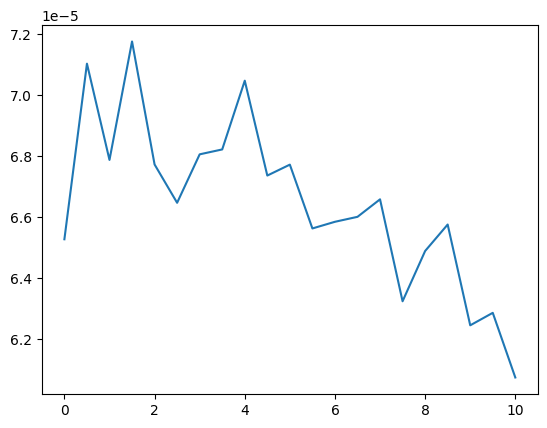

In [35]:
ridx = 3

time_list = []
rho_list = []

for idx in prof.keys():
    time_list.append(sn[idx].Time.value)
    rho_list.append(prof[idx]['rholist'][ridx])

plt.plot(time_list, rho_list)

In [12]:
sn_fid = arepo.Snapshot('lvl5-beta08-adi-dens/output', 0, combineFiles=True)
sn_strict = arepo.Snapshot('lvl5-beta08-adi-dens-strict/output', 0, combineFiles=True)

In [13]:
vmag_fid = np.linalg.norm(sn_fid.part0.vel.value, axis=1)
vmag_strict = np.linalg.norm(sn_strict.part0.vel.value, axis=1)
print(vmag_fid[:10])
print(vmag_strict[:10])

[11.96907525 11.78902836 11.98482385 12.0597209  12.0738611  12.22413582
 11.54106081 11.8608379  11.46806026 10.81735206]
[8.48304834 8.41298548 8.45450298 8.6499521  8.65908101 8.40233383
 8.32122151 8.09121866 8.50750371 8.47846775]


In [ ]:
center = np.array([1290]*3)/2.
pos_fid = sn_fid.part0.pos.value - center
pos_strict = sn_strict.part0.pos.value - center


In [14]:
6e-6/8

7.5e-07

In [16]:
(3.75e4/7.5e3)**(1/3) * 0.04

0.06839903786706787

In [187]:
# sn08fbar = {}
sn08 = {}
sn07 = {}
sn067 = {}
sn06 = {}
sn05 = {}

sn05_vp03 = {}
sn05_vp04 = {}

idx_list = np.arange(0, 701, 100)
for idx in tqdm(idx_list):
    # try:
        # sn08fbar[idx] = arepo.Snapshot('lvl5-beta08-fbar02-dens/output', idx, combineFiles=True)
    # except:
        # pass
        
    sn08[idx] = arepo.Snapshot('lvl5-beta08-dens/output', idx, combineFiles=True)
    sn07[idx] = arepo.Snapshot('lvl5-beta07-dens/output', idx, combineFiles=True)    
    sn067[idx] = arepo.Snapshot('lvl5-beta067-dens/output', idx, combineFiles=True)    
    sn06[idx] = arepo.Snapshot('lvl5-beta06-dens/output', idx, combineFiles=True)    
    sn05[idx] = arepo.Snapshot('lvl5-beta05-dens/output', idx, combineFiles=True)
    
    # sn05_vp03[idx] = arepo.Snapshot('lvl5-beta05-vphi03-dens/output', idx, combineFiles=True)
    # sn05_vp04[idx] = arepo.Snapshot('lvl5-beta05-vphi04-dens/output', idx, combineFiles=True)

100%|██████████| 8/8 [00:10<00:00,  1.36s/it]


In [189]:
time = []
stmass08 = []
stmass08 = []
stmass07 = []
stmass067 = []
stmass06 = []
stmass05 = []

stmass05_vp03 = []
stmass05_vp04 = []

for idx in tqdm(idx_list):
    time.append(sn08[idx].Time.value)
    
    st = 0
    if sn08[idx].NumPart_Total[4] > 0:
        st = np.sum(sn08[idx].part4.mass.value[sn08[idx].part4.GFM_StellarFormationTime > 0])
    stmass08.append(st)
    
    st = 0
    if sn07[idx].NumPart_Total[4] > 0:
        st = np.sum(sn07[idx].part4.mass.value[sn07[idx].part4.GFM_StellarFormationTime > 0])
    stmass07.append(st)
    
    st = 0
    if sn067[idx].NumPart_Total[4] > 0:
        st = np.sum(sn067[idx].part4.mass.value[sn067[idx].part4.GFM_StellarFormationTime > 0])
    stmass067.append(st)
    
    st = 0
    if sn06[idx].NumPart_Total[4] > 0:
        st = np.sum(sn06[idx].part4.mass.value[sn06[idx].part4.GFM_StellarFormationTime > 0])
    stmass06.append(st)
    
    st = 0
    if sn05[idx].NumPart_Total[4] > 0:
        st = np.sum(sn05[idx].part4.mass.value[sn05[idx].part4.GFM_StellarFormationTime > 0])
    stmass05.append(st)
    
#     st = 0
#     if sn05_vp03[idx].NumPart_Total[4] > 0:
#         st = np.sum(sn05_vp03[idx].part4.mass.value[sn05_vp03[idx].part4.GFM_StellarFormationTime > 0])
#     stmass05_vp03.append(st)
    
#     st = 0
#     if sn05_vp04[idx].NumPart_Total[4] > 0:
#         st = np.sum(sn05_vp04[idx].part4.mass.value[sn05_vp04[idx].part4.GFM_StellarFormationTime > 0])
#     stmass05_vp04.append(st)
    
    # if idx in sn08fbar.keys():
        # st = 0
        # timefbar.append(sn08fbar[idx].Time.value)
        # if sn08fbar[idx].NumPart_Total[4] > 0:
            # st = np.sum(sn08fbar[idx].part4.mass.value[sn08fbar[idx].part4.GFM_StellarFormationTime > 0])
        # stmass08fbar.append(st)
    

100%|██████████| 8/8 [00:00<00:00, 976.73it/s]


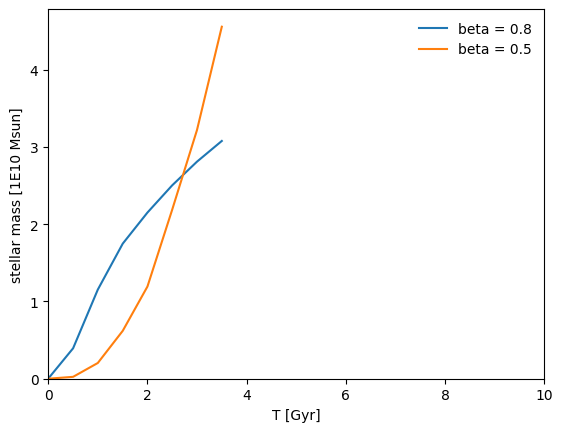

In [190]:
# plt.plot(timefbar, stmass08fbar, label='beta = 0.8, fbar=0.2')
plt.plot(time, stmass08, label='beta = 0.8')
# plt.plot(time, stmass07, label='beta = 0.7, fbar=0.157 (Planck)')
plt.plot(time, stmass05, label='beta = 0.5')
# plt.plot(time, stmass05_vp03, label='beta = 0.5, vphi=0.3')
# plt.plot(time, stmass05_vp04, label='beta = 0.5, vphi=0.4')
plt.xlim(0, 10)
plt.ylim(0, None)
plt.xlabel('T [Gyr]')
plt.ylabel('stellar mass [1E10 Msun]')
plt.legend(frameon=False)

In [171]:
def weighted_median(values, weights):
    i = np.argsort(values)
    c = np.cumsum(weights[i])
    return values[i[np.searchsorted(c, 0.5 * c[-1])]]

def get_halfmass_radius(sn):
    center = sn.part1.pos.value[np.argmin(sn.part1.pot)]
    
    if sn.NumPart_Total[4] == 0:
        return np.nan
    
    pos = sn.part4.pos.value - center
    mass = sn.part4.mass.value
    r = np.linalg.norm(pos, axis=1)
    
    is_star = sn.part4.GFM_StellarFormationTime > 0
    
    rhalf = weighted_median(r[is_star], mass[is_star])
    # print('mass below=', np.sum(mass[np.logical_and(is_star, r < rhalf)]))
    # print('mass above=', np.sum(mass[np.logical_and(is_star, r > rhalf)]))
    
    return rhalf

In [174]:
idx = 600
print(get_halfmass_radius(sn08[idx]))
print(get_halfmass_radius(sn05[idx]))
print(get_halfmass_radius(sn05_vp03[idx]))
print(get_halfmass_radius(sn05_vp04[idx]))

2.7208835053919977
3.996940756680101
9.08573169723587
12.52064044300667


In [185]:
sn = sn05[0]
R200 = 129
G = 43018.7

fc = 0.971007

center = sn.part1.pos.value[np.argmin(sn.part1.pot.value)]
pos0 = sn.part0.pos.value - center
pos1 = sn.part1.pos.value - center
r0 = np.linalg.norm(pos0, axis=1)
r1 = np.linalg.norm(pos1, axis=1)
vel0 = sn.part0.vel.value
vel1 = sn.part1.vel.value
mass0 = sn.part0.mass.value
mass1 = sn.MassTable[1]
u0 = sn.part0.u.value
M0 = np.sum(mass0[r0 < R200])
M1 = mass1 * np.sum(r1 < R200)

v200 = np.sqrt(G * (M0 + M1)/R200)

j0 = np.cross(pos0, vel0) * mass0.reshape(-1, 1)
j0 = np.sum(np.linalg.norm(j0[r0 < R200], axis=1)) / M0
j1 = np.cross(pos1, vel1) * mass1
j1 = np.sum(np.linalg.norm(j1[r1 < R200], axis=1)) / M1

E0 = sn.part0.pot.value + 0.5*np.linalg.norm(vel0, axis=1)**2 + u0
E0 = np.abs(np.sum(E0))
E1 = sn.part1.pot.value + 0.5*np.linalg.norm(vel1, axis=1)**2
E1 = np.abs(np.sum(E1))

print(M0, M1)
print(j0, j1)
print(np.sqrt(E0), np.sqrt(E1))

# lambda0 = j0 * E0**0.5 / G / M0**1.5
# lambda1 = j1 * E1**0.5 / G / M1**1.5
lambda0 = j0 / (np.sqrt(2) * v200 * R200)
lambda1 = j1 / (np.sqrt(2) * v200 * R200)
print(lambda0, lambda1)

4.56332 24.51
1285.060914038775 3900.1194401338457
90995.516 57363.996
0.07153818294772996 0.21711613432347726


In [166]:
sfr05  = np.genfromtxt('lvl5-beta05-dens/output/sfr.txt')
sfr06  = np.genfromtxt('lvl5-beta06-dens/output/sfr.txt')
sfr067 = np.genfromtxt('lvl5-beta067-dens/output/sfr.txt')
sfr07  = np.genfromtxt('lvl5-beta07-dens/output/sfr.txt')
sfr08  = np.genfromtxt('lvl5-beta08-dens/output/sfr.txt')

# sfr08fbar = np.genfromtxt('lvl5-beta08-fbar02-dens/output/sfr.txt')

Text(0, 0.5, 'SFR [Msun/yr]')

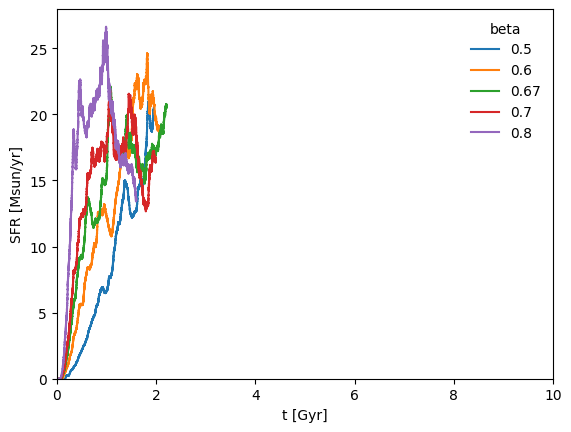

In [167]:
plt.plot(sfr05[:,0], sfr05[:,2], label='0.5')
plt.plot(sfr06[:,0], sfr06[:,2], label='0.6')
plt.plot(sfr067[:,0], sfr067[:,2], label='0.67')
plt.plot(sfr07[:,0], sfr07[:,2], label='0.7')
plt.plot(sfr08[:,0], sfr08[:,2], label='0.8')

# plt.plot(sfr08fbar[:,0], sfr08fbar[:,2], label='0.8 fbar=0.2')

plt.legend(frameon=False, title='beta')
plt.xlim(0, 10)
plt.ylim(0, None)
plt.xlabel('t [Gyr]')
plt.ylabel('SFR [Msun/yr]')
# plt.yscale('log')

Text(0, 0.5, 'stellar mass [1E10 Msun]')

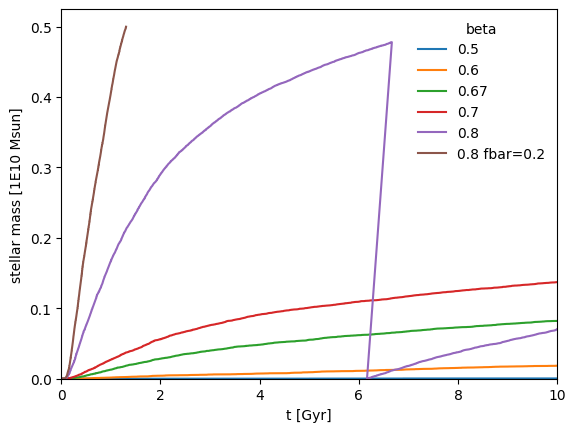

In [131]:
plt.plot(sfr05[:,0], sfr05[:,5], label='0.5')
plt.plot(sfr06[:,0], sfr06[:,5], label='0.6')
plt.plot(sfr067[:,0], sfr067[:,5], label='0.67')
plt.plot(sfr07[:,0], sfr07[:,5], label='0.7')
plt.plot(sfr08[:,0], sfr08[:,5], label='0.8')

plt.plot(sfr08fbar[:,0], sfr08fbar[:,5], label='0.8 fbar=0.2')

plt.legend(frameon=False, title='beta')
plt.xlim(0, 10)
plt.ylim(0, None)
plt.xlabel('t [Gyr]')
plt.ylabel('stellar mass [1E10 Msun]')
# plt.yscale('log')

In [28]:
sn0 = {}
sn0[0.5] = arepo.Snapshot('lvl5-beta05-dens/output', 0, combineFiles=True)
sn0[0.6] = arepo.Snapshot('lvl5-beta06-dens/output', 0, combineFiles=True)
sn0[0.67] = arepo.Snapshot('lvl5-beta067-dens/output', 0, combineFiles=True)
sn0[0.7] = arepo.Snapshot('lvl5-beta07-dens/output', 0, combineFiles=True)
sn0[0.8] = arepo.Snapshot('lvl5-beta08-dens/output', 0, combineFiles=True)

prof0 = {}
for k in sn0.keys():
    prof0[k] = gas_profile(sn0[k])

[None, None]

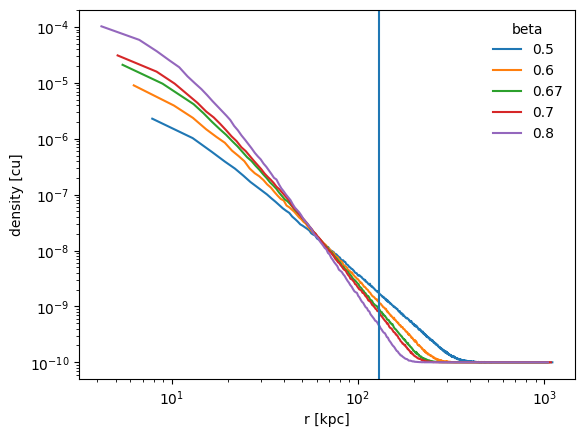

In [110]:
fig, ax = plt.subplots(1, 1)

for k in prof0.keys():
    ax.plot(prof0[k]['rlist'], prof0[k]['rholist'], label=str(k))

ax.axvline(129, c='k')
ax.legend(frameon=False, title='beta')

ax.set(xlabel='r [kpc]')
ax.set(ylabel='density [cu]')

ax.set(xscale='log', yscale='log')

# cooling flow

In [65]:
import numpy as np
import arepo
from scipy.stats import binned_statistic_2d
import matplotlib as mpl
import matplotlib.pyplot as plt

In [117]:
# load in snapshots and write down unit conversion factors
sn400 = {}
idx = 1600
sn400[0.5]  = arepo.Snapshot('lvl5-beta05-dens/output', idx, combineFiles=True)
sn400[0.6]  = arepo.Snapshot('lvl5-beta06-dens/output', idx, combineFiles=True)
sn400[0.67] = arepo.Snapshot('lvl5-beta067-dens/output', idx, combineFiles=True)
sn400[0.7]  = arepo.Snapshot('lvl5-beta07-dens/output', idx, combineFiles=True)
sn400[0.8]  = arepo.Snapshot('lvl5-beta08-dens/output', idx, combineFiles=True)

UnitLength_in_cm = sn400[0.5].parameters.UnitLength_in_cm
UnitMass_in_g = sn400[0.5].parameters.UnitMass_in_g
UnitVelocity_in_cm_per_s = sn400[0.5].parameters.UnitVelocity_in_cm_per_s

UnitTime_in_s = UnitLength_in_cm / UnitVelocity_in_cm_per_s
UnitDensity_in_cgs = UnitMass_in_g / UnitLength_in_cm**3
UnitPressure_in_cgs = UnitMass_in_g / UnitLength_in_cm / UnitTime_in_s**2
HubbleParam = 1.0

print('UnitLength_in_cm =', UnitLength_in_cm)
print('UnitMass_in_g =', UnitMass_in_g)
print('UnitVelocity_in_cm_per_s =', UnitVelocity_in_cm_per_s)
print('UnitTime_in_s =', UnitTime_in_s)
print('UnitDensity_in_cgs =', UnitDensity_in_cgs)
print('UnitPressure_in_cgs =', UnitPressure_in_cgs)

PROTONMASS = 1.67262178e-24
GAMMA = 5./3.

UnitLength_in_cm = 3.08568e+21
UnitMass_in_g = 1.989e+43
UnitVelocity_in_cm_per_s = 100000.0
UnitTime_in_s = 3.08568e+16
UnitDensity_in_cgs = 6.76989801444063e-22
UnitPressure_in_cgs = 6.76989801444063e-12


In [118]:
# compute tcool
def get_tcool(sn):
    # need h, a factors for cosmo run
    P = np.copy(sn.part0.Pressure.value)
    P *= UnitPressure_in_cgs
    
    rho = np.copy(sn.part0.Density.value)
    print(np.max(rho))
    rho *= UnitDensity_in_cgs
    print(np.median(rho))
    
    nH = np.copy(sn.part0.GFM_Metals[:,0]) * rho / PROTONMASS
    # print('nH =', np.median(nH))
    Lambda = sn.part0.GFM_CoolingRate
    
    tcool = P / ((GAMMA-1) * nH**2 * Lambda)
    # print(np.median(tcool))
    tcool /= UnitTime_in_s
    # print(np.median(tcool))
    return tcool

tcool = {}
for k in sn400.keys():
    tcool[k] = get_tcool(sn400[k])

0.00046146987
7.026705e-32
0.00069710973
7.027955e-32
0.0010440344
7.408826e-32
0.0017928054
7.803936e-32
0.05525497
1.0787661e-31


/tmp/ipykernel_2589261/2583197289.py:16: RuntimeWarning: divide by zero encountered in divide
  tcool = P / ((GAMMA-1) * nH**2 * Lambda)


In [119]:
# compute tflow
def get_tflow(sn):
    # need h, a factors for cosmo run
    center = np.array([sn.BoxSize]*3)/2.

    pos = np.copy(sn.part0.pos.value) - center
    r = np.linalg.norm(pos, axis=1)
    rhat = pos / r.reshape(-1, 1)

    vel = np.copy(sn.part0.vel.value)
    vr = np.sum(rhat * vel, axis=1)
    
    tflow = -r/vr
    
    return r, tflow

r = {}
tflow = {}
for k in sn400.keys():
    r[k], tflow[k] = get_tflow(sn400[k])

(3e-06, 0.001)
(3e-06, 0.001)
(3e-06, 0.001)
(3e-06, 0.001)
(3e-06, 0.001)


[Text(0, 0.5, 'tflow/tcool')]

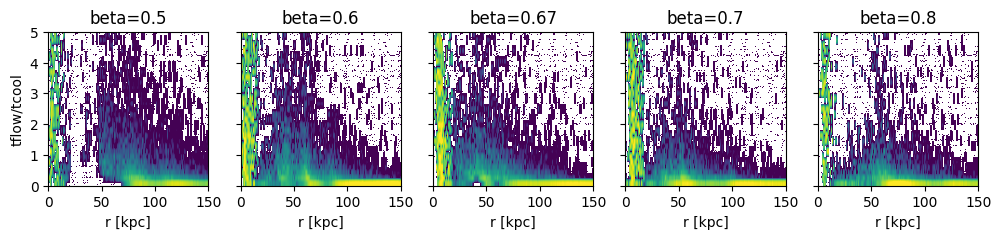

In [120]:
rbins = np.linspace(0, 150, 150)
ratbins = np.linspace(0, 5, 30)

dx = (rbins[-1] - rbins[0]) / (len(rbins)-1)
dy = (ratbins[-1] - ratbins[0]) / (len(ratbins)-1)

fig, axs = plt.subplots(1, 5, figsize=(12, 2), sharex=True, sharey=True)

vmin = 3e-6
vmax = 1e-3

for i,k in enumerate(sn400.keys()):
    sn = sn400[k]
    mass = sn.part0.mass.value
    mbin, x_edge, y_edge, _ = binned_statistic_2d(r[k], tflow[k]/tcool[k], mass/dx/dy, 
                                                  statistic='sum', bins=[rbins, ratbins])

    ax = axs[i]
    im = ax.imshow(mbin.T, origin='lower', 
                   extent=[x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]],
                   norm=mpl.colors.LogNorm(vmin=vmin, vmax=vmax))
    print(im.get_clim())
    ax.set_aspect('auto')
    ax.set(xlabel='r [kpc]', title='beta='+str(k))
    
axs[0].set(ylabel='tflow/tcool')

In [121]:
k = 0.8
key = np.logical_and(r[k] > 40, r[k] < 60)
# print(tflow[k]/tcool[k])
print(tflow[k])
print(tcool[k])
# plt.hist((tflow[k]/tcool[k])[key])

[-2.06981592e+01 -9.67613905e+01  3.38828744e+01 ... -5.26996575e-01
  4.90431441e-02  4.34618599e-02]
[-3.3172031e+04 -5.6171348e+03  3.7017641e+05 ... -1.2476309e-05
 -1.4991613e-05 -5.6186459e-06]


In [ ]:
beta = np.array([0.5, 0.6, 2/3, 0.7, 0.8])
rho0 = np.array([1.42711e-05, 2.62337e-05, 

# check lvl5 ics? not actually reading density??

In [156]:
ics = arepo.Snapshot('../../ics/MW6iso/lvl5-dens/MW_ICs-beta08.dat')
snadi0 = arepo.Snapshot('lvl5-beta08-adi-dens/output', 0, combineFiles=True)
sn0 = arepo.Snapshot('lvl5-beta08-dens/output', 0, combineFiles=True)

In [160]:
rho_ics = ics.part0.mass[np.argsort(ics.part0.id)]
rho_snadi0 = snadi0.part0.rho.value[np.argsort(snadi0.part0.id)]
mass_snadi0 = snadi0.part0.mass.value[np.argsort(snadi0.part0.id)]
rho_sn0 = sn0.part0.rho.value[np.argsort(sn0.part0.id)]
mass_sn0 = sn0.part0.mass.value[np.argsort(sn0.part0.id)]

print(rho_ics[:4])
print(rho_sn0[:4])
# print(mass_sn0[:4])
print(rho_snadi0[:4])

print()
print(np.sort(ics.part0.id)[:4])
print(np.sort(sn0.part0.id)[:4])

[3.8450878e-08 8.5357021e-07 5.1689732e-09 1.8238385e-08]
[1.00000001e-10 1.26017925e-08 1.00000001e-10 1.00000001e-10]
[3.84508780e-08 8.53570214e-07 5.16897325e-09 1.82383850e-08]

[1 2 3 4]
[1 2 3 4]
